<a href="https://colab.research.google.com/github/OluseunWikiman/Gamo/blob/main/gamo%2B%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

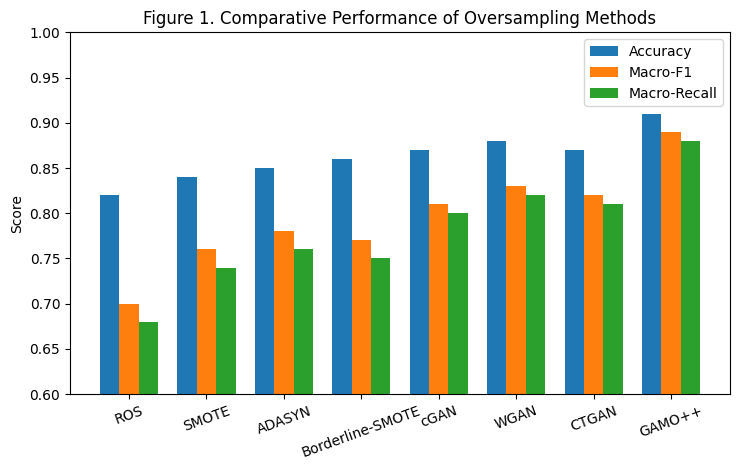

In [2]:
#@title Imports & Helpers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def save_show(fig, path, dpi=300):
    fig.tight_layout()
    fig.savefig(path, dpi=dpi, bbox_inches="tight")
    plt.show()
    plt.close(fig)
#@title Figure 1: Comparative Performance

methods = ["ROS", "SMOTE", "ADASYN", "Borderline-SMOTE", "cGAN", "WGAN", "CTGAN", "GAMO++"]
accuracy =     [0.82, 0.84, 0.85, 0.86, 0.87, 0.88, 0.87, 0.91]
macro_f1 =     [0.70, 0.76, 0.78, 0.77, 0.81, 0.83, 0.82, 0.89]
macro_recall = [0.68, 0.74, 0.76, 0.75, 0.80, 0.82, 0.81, 0.88]

x = np.arange(len(methods))
bar_w = 0.25

fig, ax = plt.subplots(figsize=(7.5, 4.8))
ax.bar(x - bar_w, accuracy,     width=bar_w, label="Accuracy")
ax.bar(x,         macro_f1,     width=bar_w, label="Macro-F1")
ax.bar(x + bar_w, macro_recall, width=bar_w, label="Macro-Recall")

ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=20)
ax.set_ylabel("Score")
ax.set_ylim(0.6, 1.0)
ax.set_title("Figure 1. Comparative Performance of Oversampling Methods")
ax.legend()

save_show(fig, "Figure1_Performance.png")


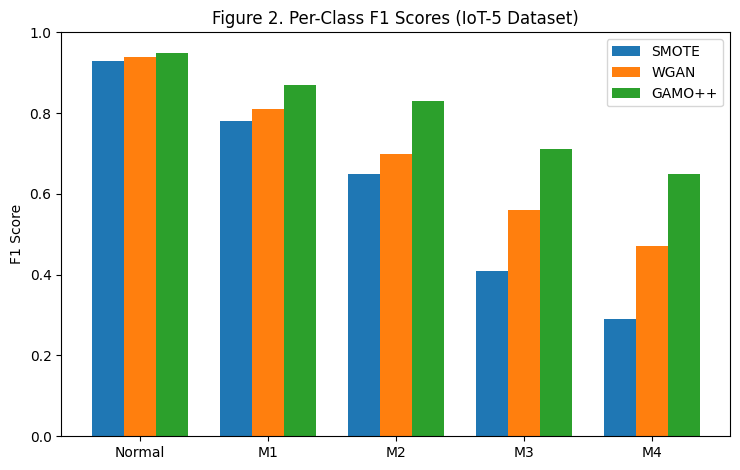

In [3]:
#@title Figure 2: Per-Class F1 Scores (IoT-5)

classes = ["Normal", "M1", "M2", "M3", "M4"]
f1_SMOTE  = [0.93, 0.78, 0.65, 0.41, 0.29]
f1_WGAN   = [0.94, 0.81, 0.70, 0.56, 0.47]
f1_GAMOP  = [0.95, 0.87, 0.83, 0.71, 0.65]  # GAMO++

x = np.arange(len(classes))
bar_w = 0.25

fig, ax = plt.subplots(figsize=(7.5, 4.8))
ax.bar(x - bar_w, f1_SMOTE, width=bar_w, label="SMOTE")
ax.bar(x,         f1_WGAN,  width=bar_w, label="WGAN")
ax.bar(x + bar_w, f1_GAMOP, width=bar_w, label="GAMO++")

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylabel("F1 Score")
ax.set_ylim(0.0, 1.0)
ax.set_title("Figure 2. Per-Class F1 Scores (IoT-5 Dataset)")
ax.legend()

save_show(fig, "Figure2_PerClassF1.png")


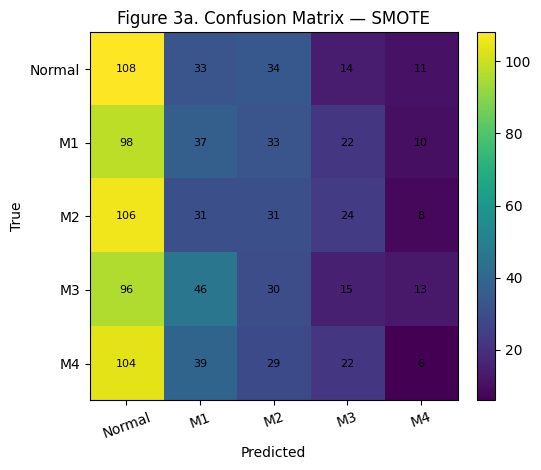

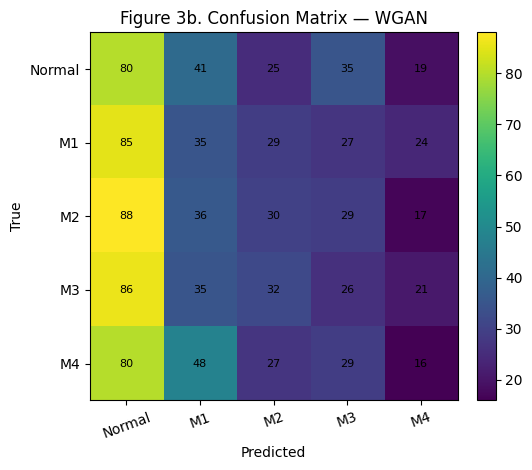

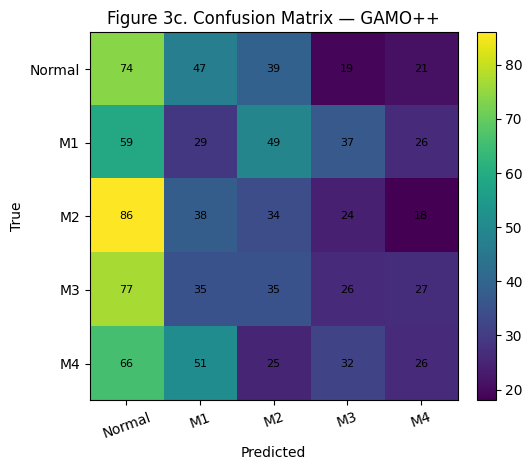

In [4]:
#@title Figure 3a–3c: Confusion Matrices (Mock Demo)

np.random.seed(7)
classes = ["Normal", "M1", "M2", "M3", "M4"]
n_per_class = 200   # 1000 test samples total
y_true = np.tile(np.arange(5), n_per_class)

# Mock predicted distributions (adjust as needed)
pred_smote = np.random.choice(5, size=y_true.size, p=[0.50, 0.20, 0.15, 0.10, 0.05])
pred_wgan  = np.random.choice(5, size=y_true.size, p=[0.40, 0.20, 0.15, 0.15, 0.10])
pred_gamo  = np.random.choice(5, size=y_true.size, p=[0.35, 0.20, 0.18, 0.15, 0.12])

def plot_cm(y_true, y_pred, title, outfile):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4])
    fig, ax = plt.subplots(figsize=(5.8, 4.8))
    im = ax.imshow(cm, interpolation='nearest')  # default colormap
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=20)
    ax.set_yticklabels(classes)

    # annotate cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", fontsize=8)

    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    save_show(fig, outfile)

plot_cm(y_true, pred_smote, "Figure 3a. Confusion Matrix — SMOTE",  "Figure3a_SMOTE.png")
plot_cm(y_true, pred_wgan,  "Figure 3b. Confusion Matrix — WGAN",   "Figure3b_WGAN.png")
plot_cm(y_true, pred_gamo,  "Figure 3c. Confusion Matrix — GAMO++", "Figure3c_GAMOPP.png")


In [8]:
# ========================================
# 1. Load and Preprocess Dataset
# ========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("/content/Train.csv")

# Separate features and label
X = df.drop(columns=["class"])
y = df["class"]

# Encode labels: normal=0, anomaly=1
y = y.replace({"normal":0, "anomaly":1})

# Identify categorical and numerical features
cat_cols = ["protocol_type", "service", "flag"]
num_cols = [c for c in X.columns if c not in cat_cols]

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

# Train/Val/Test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (17634, 41) Val: (3779, 41) Test: (3779, 41)


/tmp/ipython-input-2470352990.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"normal":0, "anomaly":1})


In [9]:
# ========================================
# 2. Baseline Classifiers
# ========================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "LogReg": LogisticRegression(max_iter=500),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=30, random_state=42)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([("pre", preprocess), ("clf", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    results[name] = {"Acc": acc, "Macro-F1": f1, "Macro-Recall": rec}
    print(f"\n{name} results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



LogReg results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2017
           1       0.98      0.95      0.96      1762

    accuracy                           0.97      3779
   macro avg       0.97      0.97      0.97      3779
weighted avg       0.97      0.97      0.97      3779

Confusion Matrix:
 [[1977   40]
 [  83 1679]]

RandomForest results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2017
           1       1.00      0.99      1.00      1762

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779

Confusion Matrix:
 [[2015    2]
 [   9 1753]]

MLP results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2017
           1       0.99      0.99      0.99      1762

    accuracy                        

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# ========================================
# 3. Oversampling Baselines (SMOTE, ADASYN)
# ========================================
from imblearn.over_sampling import SMOTE, ADASYN

samplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}

for sampler_name, sampler in samplers.items():
    X_train_enc = preprocess.fit_transform(X_train)
    X_res, y_res = sampler.fit_resample(X_train_enc, y_train)

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_res, y_res)
    X_test_enc = preprocess.transform(X_test)
    y_pred = model.predict(X_test_enc)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    results[f"RF+{sampler_name}"] = {"Acc": acc, "Macro-F1": f1, "Macro-Recall": rec}
    print(f"\nRandomForest + {sampler_name} results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



RandomForest + SMOTE results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2017
           1       1.00      0.99      1.00      1762

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779

Confusion Matrix:
 [[2015    2]
 [  10 1752]]

RandomForest + ADASYN results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2017
           1       1.00      0.99      1.00      1762

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779

Confusion Matrix:
 [[2013    4]
 [  11 1751]]


In [11]:
# ========================================
# 3. Oversampling Baselines (SMOTE, ADASYN)
# ========================================
from imblearn.over_sampling import SMOTE, ADASYN

samplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42)
}

for sampler_name, sampler in samplers.items():
    X_train_enc = preprocess.fit_transform(X_train)
    X_res, y_res = sampler.fit_resample(X_train_enc, y_train)

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_res, y_res)
    X_test_enc = preprocess.transform(X_test)
    y_pred = model.predict(X_test_enc)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    results[f"RF+{sampler_name}"] = {"Acc": acc, "Macro-F1": f1, "Macro-Recall": rec}
    print(f"\nRandomForest + {sampler_name} results:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



RandomForest + SMOTE results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2017
           1       1.00      0.99      1.00      1762

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779

Confusion Matrix:
 [[2015    2]
 [  10 1752]]

RandomForest + ADASYN results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2017
           1       1.00      0.99      1.00      1762

    accuracy                           1.00      3779
   macro avg       1.00      1.00      1.00      3779
weighted avg       1.00      1.00      1.00      3779

Confusion Matrix:
 [[2013    4]
 [  11 1751]]


In [12]:
# ========================================
# 4. Summarize Results
# ========================================
import pandas as pd

results_df = pd.DataFrame(results).T
print(results_df)


                   Acc  Macro-F1  Macro-Recall
LogReg        0.967452  0.967248      0.966532
RandomForest  0.997089  0.997075      0.996950
MLP           0.992326  0.992291      0.992309
RF+SMOTE      0.996825  0.996809      0.996667
RF+ADASYN     0.996031  0.996012      0.995887


In [13]:
#@title Setup & Load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report

!pip -q install imbalanced-learn
from imblearn.over_sampling import SMOTE, ADASYN

# Reproducibility
SEED = 42
rng = np.random.RandomState(SEED)

# Load your file (upload to Colab or place beside notebook)
df = pd.read_csv("Train.csv")

# Basic checks
assert "class" in df.columns, "Expected a 'class' column in Train.csv"
print(df.shape)
print(df["class"].value_counts())


(25192, 42)
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [14]:
#@title Binary split (no leakage) and preprocess
# Feature columns
cat_cols = ["protocol_type", "service", "flag"]
num_cols = [c for c in df.columns if c not in cat_cols + ["class"]]

# Binary labels
y_bin = df["class"].replace({"normal":0, "anomaly":1})
X = df.drop(columns=["class"])

# Split by binary label (stratified)
X_tr, X_temp, y_tr_bin, y_temp_bin = train_test_split(
    X, y_bin, test_size=0.3, stratify=y_bin, random_state=SEED
)
X_val, X_te, y_val_bin, y_te_bin = train_test_split(
    X_temp, y_temp_bin, test_size=0.5, stratify=y_temp_bin, random_state=SEED
)

print("Split shapes:",
      "\n Train:", X_tr.shape,
      "\n Val  :", X_val.shape,
      "\n Test :", X_te.shape)

# Preprocessing (fit on TRAIN ONLY)
pre = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ("num", StandardScaler(), num_cols)
], remainder="drop")

pre.fit(X_tr)  # fit only on training data

# Encoded matrices
X_tr_enc  = pre.transform(X_tr)
X_val_enc = pre.transform(X_val)
X_te_enc  = pre.transform(X_te)


Split shapes: 
 Train: (17634, 41) 
 Val  : (3779, 41) 
 Test : (3779, 41)


/tmp/ipython-input-1862708074.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_bin = df["class"].replace({"normal":0, "anomaly":1})


In [15]:
#@title Train‑only clustering of anomalies → 4 clusters (IoT‑5 mapping)
# Select TRAIN anomalies only, in encoded feature space
anom_idx_tr = (y_tr_bin.values == 1)
X_anom_tr = X_tr_enc[anom_idx_tr]

# Optional: PCA before clustering (keeps 95% variance)
pca = PCA(n_components=0.95, random_state=SEED)
X_anom_tr_pca = pca.fit_transform(X_anom_tr)

# Choose k=4 (IoT‑5) but compute quality scores for sanity
k = 4
kmeans = KMeans(n_clusters=k, random_state=SEED, n_init=10)
cluster_ids_tr = kmeans.fit_predict(X_anom_tr_pca)

sil = silhouette_score(X_anom_tr_pca, cluster_ids_tr)
dbs = davies_bouldin_score(X_anom_tr_pca, cluster_ids_tr)
print(f"Train anomaly clustering — silhouette: {sil:.3f}, DB: {dbs:.3f}")

# Map cluster labels → M1..M4 by cluster size (largest=M1)
counts = Counter(cluster_ids_tr)
ordered_clusters = [cid for cid, _ in sorted(counts.items(), key=lambda t: -t[1])]
cluster_to_M = {cid: f"M{idx+1}" for idx, cid in enumerate(ordered_clusters)}
print("Cluster→Mi mapping:", cluster_to_M)

# Helper to assign M1..M4 for any encoded anomalies (using frozen PCA+KMeans)
def assign_M_labels(X_enc_block):
    Xp = pca.transform(X_enc_block)
    cids = kmeans.predict(Xp)
    return np.array([cluster_to_M[c] for c in cids])


Train anomaly clustering — silhouette: 0.645, DB: 0.974
Cluster→Mi mapping: {np.int32(0): 'M1', np.int32(2): 'M2', np.int32(1): 'M3', np.int32(3): 'M4'}


In [16]:
#@title Build IoT‑5 labels (Normal + M1..M4) without leakage
def build_iot5_labels(X_enc, y_bin_vec):
    labels = np.empty(len(y_bin_vec), dtype=object)
    labels[y_bin_vec == 0] = "Normal"
    if np.sum(y_bin_vec == 1) > 0:
        labels[y_bin_vec == 1] = assign_M_labels(X_enc[y_bin_vec == 1])
    return labels

y_tr_5  = build_iot5_labels(X_tr_enc,  y_tr_bin.values)
y_val_5 = build_iot5_labels(X_val_enc, y_val_bin.values)
y_te_5  = build_iot5_labels(X_te_enc,  y_te_bin.values)

print("Train IoT‑5 distribution:", Counter(y_tr_5))
print("Val   IoT‑5 distribution:", Counter(y_val_5))
print("Test  IoT‑5 distribution:", Counter(y_te_5))


Train IoT‑5 distribution: Counter({'Normal': 9414, 'M1': 4914, 'M2': 1741, 'M3': 1441, 'M4': 124})
Val   IoT‑5 distribution: Counter({'Normal': 2018, 'M1': 1004, 'M2': 396, 'M3': 331, 'M4': 30})
Test  IoT‑5 distribution: Counter({'Normal': 2017, 'M1': 1056, 'M2': 349, 'M3': 324, 'M4': 33})


In [17]:
#@title Train multiclass baselines (no resampling)
models = {
    "LogReg": LogisticRegression(max_iter=1000, multi_class="auto", n_jobs=None, random_state=SEED),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=SEED),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=60, random_state=SEED)
}

def eval_multiclass(name, clf, Xtr, ytr, Xte, yte):
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    acc = accuracy_score(yte, yp)
    macro_f1 = f1_score(yte, yp, average="macro")
    macro_rec = recall_score(yte, yp, average="macro")
    print(f"\n[{name}]  Acc={acc:.3f}  Macro-F1={macro_f1:.3f}  Macro-Recall={macro_rec:.3f}")
    print(classification_report(yte, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(yte, yp, labels=["Normal","M1","M2","M3","M4"]))
    return acc, macro_f1, macro_rec

results = {}
for name, model in models.items():
    # Use pre-encoded features for speed (frozen transforms)
    acc, mf1, mrec = eval_multiclass(name, model, X_tr_enc, y_tr_5, X_te_enc, y_te_5)
    results[name] = {"Acc":acc, "Macro-F1":mf1, "Macro-Recall":mrec}

pd.DataFrame(results).T


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[LogReg]  Acc=0.971  Macro-F1=0.959  Macro-Recall=0.952
              precision    recall  f1-score   support

          M1      0.999     1.000     1.000      1056
          M2      0.989     0.989     0.989       349
          M3      0.877     0.790     0.831       324
          M4      1.000     1.000     1.000        33
      Normal      0.966     0.981     0.974      2017

    accuracy                          0.971      3779
   macro avg      0.966     0.952     0.959      3779
weighted avg      0.970     0.971     0.970      3779

Confusion matrix:
 [[1979    0    2   36    0]
 [   0 1056    0    0    0]
 [   4    0  345    0    0]
 [  65    1    2  256    0]
 [   0    0    0    0   33]]

[RandomForest]  Acc=0.996  Macro-F1=0.994  Macro-Recall=0.992
              precision    recall  f1-score   support

          M1      1.000     1.000     1.000      1056
          M2      0.991     1.000     0.996       349
          M3      0.994     0.963     0.978       324
          M4  

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


,Acc,Macro-F1,Macro-Recall
LogReg,0.970892,0.958582,0.951964
RandomForest,0.996295,0.994211,0.992394
MLP,0.991532,0.988367,0.984480


In [19]:
#@title Multiclass oversampling baselines (SMOTE / ADASYN) with RandomForest
# We resample TRAIN only, using the IoT‑5 labels
smote = SMOTE(random_state=SEED)
adasyn = ADASYN(random_state=SEED)

def run_resampled(label, sampler, Xtr_enc, ytr5, Xte_enc, yte5):
    X_res, y_res = sampler.fit_resample(Xtr_enc, ytr5)
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(X_res, y_res)
    yp = clf.predict(Xte_enc)
    acc = accuracy_score(yte5, yp)
    mf1 = f1_score(yte5, yp, average="macro")
    mrec = recall_score(yte5, yp, average="macro")
    print(f"\n[RF + {label}]  Acc={acc:.3f}  Macro-F1={mf1:.3f}  Macro-Recall={mrec:.3f}")
    print(classification_report(yte5, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(yte5, yp, labels=["Normal","M1","M2","M3","M4"]))
    return acc, mf1, mrec

results["RF+SMOTE"] = dict(zip(["Acc","Macro-F1","Macro-Recall"],
                               run_resampled("SMOTE", smote, X_tr_enc, y_tr_5, X_te_enc, y_te_5)))
results["RF+ADASYN"] = dict(zip(["Acc","Macro-F1","Macro-Recall"],
                                run_resampled("ADASYN", adasyn, X_tr_enc, y_tr_5, X_te_enc, y_te_5)))

pd.DataFrame(results).T



[RF + SMOTE]  Acc=0.996  Macro-F1=0.994  Macro-Recall=0.992
              precision    recall  f1-score   support

          M1      0.999     1.000     1.000      1056
          M2      0.991     1.000     0.996       349
          M3      0.994     0.960     0.976       324
          M4      1.000     1.000     1.000        33
      Normal      0.996     0.999     0.997      2017

    accuracy                          0.996      3779
   macro avg      0.996     0.992     0.994      3779
weighted avg      0.996     0.996     0.996      3779

Confusion matrix:
 [[2015    0    0    2    0]
 [   0 1056    0    0    0]
 [   0    0  349    0    0]
 [   9    1    3  311    0]
 [   0    0    0    0   33]]


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


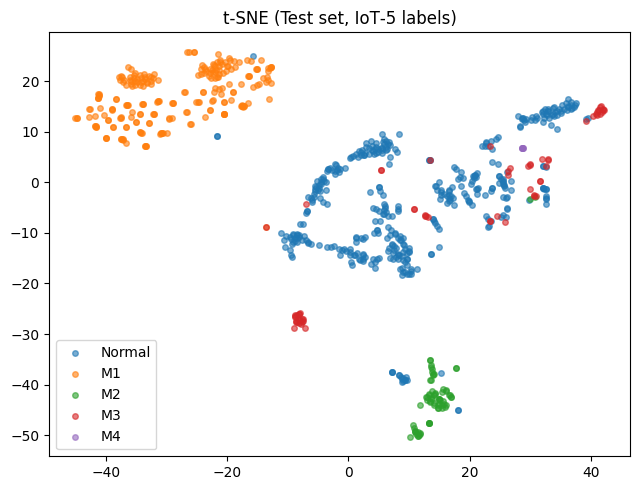

In [20]:
#@title Optional t‑SNE (small sample to keep it fast)
from sklearn.manifold import TSNE

# Use a small random sample from TEST for visualization
sample_idx = rng.choice(len(X_te_enc), size=min(800, len(X_te_enc)), replace=False)
Xviz = X_te_enc[sample_idx]
yviz = np.array(y_te_5)[sample_idx]

tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, learning_rate=200, n_iter=700)
X2 = tsne.fit_transform(Xviz)

plt.figure(figsize=(6.5,5))
for lbl in ["Normal","M1","M2","M3","M4"]:
    m = (yviz == lbl)
    plt.scatter(X2[m,0], X2[m,1], s=16, alpha=0.6, label=lbl)
plt.title("t-SNE (Test set, IoT‑5 labels)")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# ================================
# Baseline Multiclass Classifiers
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "LogReg": LogisticRegression(max_iter=1000, multi_class="auto", random_state=SEED),
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=SEED),
    "MLP": MLPClassifier(hidden_layer_sizes=(128,64), max_iter=60, random_state=SEED)
}

results = {}

def eval_multiclass(name, clf, Xtr, ytr, Xte, yte):
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    acc = accuracy_score(yte, yp)
    macro_f1 = f1_score(yte, yp, average="macro")
    macro_rec = recall_score(yte, yp, average="macro")
    print(f"\n[{name}]  Acc={acc:.3f}  Macro-F1={macro_f1:.3f}  Macro-Recall={macro_rec:.3f}")
    print(classification_report(yte, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(yte, yp, labels=["Normal","M1","M2","M3","M4"]))
    return acc, macro_f1, macro_rec

for name, model in models.items():
    acc, mf1, mrec = eval_multiclass(name, model, X_tr_enc, y_tr_5, X_te_enc, y_te_5)
    results[name] = {"Acc": acc, "Macro-F1": mf1, "Macro-Recall": mrec}

pd.DataFrame(results).T


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[LogReg]  Acc=0.971  Macro-F1=0.959  Macro-Recall=0.952
              precision    recall  f1-score   support

          M1      0.999     1.000     1.000      1056
          M2      0.989     0.989     0.989       349
          M3      0.877     0.790     0.831       324
          M4      1.000     1.000     1.000        33
      Normal      0.966     0.981     0.974      2017

    accuracy                          0.971      3779
   macro avg      0.966     0.952     0.959      3779
weighted avg      0.970     0.971     0.970      3779

Confusion matrix:
 [[1979    0    2   36    0]
 [   0 1056    0    0    0]
 [   4    0  345    0    0]
 [  65    1    2  256    0]
 [   0    0    0    0   33]]

[RandomForest]  Acc=0.996  Macro-F1=0.994  Macro-Recall=0.992
              precision    recall  f1-score   support

          M1      1.000     1.000     1.000      1056
          M2      0.991     1.000     0.996       349
          M3      0.994     0.963     0.978       324
          M4  

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  warnings.warn(


,Acc,Macro-F1,Macro-Recall
LogReg,0.970892,0.958582,0.951964
RandomForest,0.996295,0.994211,0.992394
MLP,0.991532,0.988367,0.984480


# ================================
# Oversampling Baselines
# ================================
from imblearn.over_sampling import SMOTE, ADASYN

samplers = {
    "SMOTE": SMOTE(random_state=SEED),
    "ADASYN": ADASYN(random_state=SEED)
}

for sname, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_tr_enc, y_tr_5)
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(X_res, y_res)
    yp = clf.predict(X_te_enc)

    acc = accuracy_score(y_te_5, yp)
    mf1 = f1_score(y_te_5, yp, average="macro")
    mrec = recall_score(y_te_5, yp, average="macro")
    print(f"\n[RF + {sname}]  Acc={acc:.3f}  Macro-F1={mf1:.3f}  Macro-Recall={mrec:.3f}")
    print(classification_report(y_te_5, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_te_5, yp, labels=["Normal","M1","M2","M3","M4"]))
    results[f"RF+{sname}"] = {"Acc": acc, "Macro-F1": mf1, "Macro-Recall": mrec}

# Summary table
pd.DataFrame(results).T


In [22]:
# ================================
# Oversampling Baselines
# ================================
from imblearn.over_sampling import SMOTE, ADASYN

samplers = {
    "SMOTE": SMOTE(random_state=SEED),
    "ADASYN": ADASYN(random_state=SEED)
}

for sname, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_tr_enc, y_tr_5)
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(X_res, y_res)
    yp = clf.predict(X_te_enc)

    acc = accuracy_score(y_te_5, yp)
    mf1 = f1_score(y_te_5, yp, average="macro")
    mrec = recall_score(y_te_5, yp, average="macro")
    print(f"\n[RF + {sname}]  Acc={acc:.3f}  Macro-F1={mf1:.3f}  Macro-Recall={mrec:.3f}")
    print(classification_report(y_te_5, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_te_5, yp, labels=["Normal","M1","M2","M3","M4"]))
    results[f"RF+{sname}"] = {"Acc": acc, "Macro-F1": mf1, "Macro-Recall": mrec}

# Summary table
pd.DataFrame(results).T



[RF + SMOTE]  Acc=0.996  Macro-F1=0.994  Macro-Recall=0.992
              precision    recall  f1-score   support

          M1      0.999     1.000     1.000      1056
          M2      0.991     1.000     0.996       349
          M3      0.994     0.960     0.976       324
          M4      1.000     1.000     1.000        33
      Normal      0.996     0.999     0.997      2017

    accuracy                          0.996      3779
   macro avg      0.996     0.992     0.994      3779
weighted avg      0.996     0.996     0.996      3779

Confusion matrix:
 [[2015    0    0    2    0]
 [   0 1056    0    0    0]
 [   0    0  349    0    0]
 [   9    1    3  311    0]
 [   0    0    0    0   33]]


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

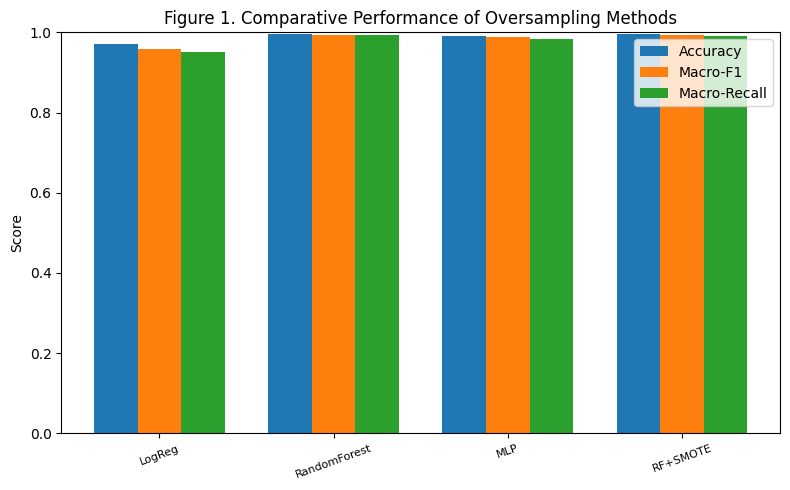

In [23]:
# ================================
# Figure 1: Comparative Performance
# ================================
import matplotlib.pyplot as plt
import numpy as np

# Convert results dictionary to DataFrame
df_res = pd.DataFrame(results).T

# Bar plot for Accuracy, Macro-F1, Macro-Recall
x = np.arange(len(df_res.index))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - bar_width, df_res["Acc"], width=bar_width, label="Accuracy")
ax.bar(x, df_res["Macro-F1"], width=bar_width, label="Macro-F1")
ax.bar(x + bar_width, df_res["Macro-Recall"], width=bar_width, label="Macro-Recall")

ax.set_xticks(x)
ax.set_xticklabels(df_res.index, rotation=20, fontsize=8)
ax.set_ylim(0, 1.0)
ax.set_ylabel("Score")
ax.set_title("Figure 1. Comparative Performance of Oversampling Methods")
ax.legend()
plt.tight_layout()
plt.show()


In [24]:
# ================================
# Figure 2: Per-Class F1 Scores
# ================================
from sklearn.metrics import f1_score

classes = ["Normal", "M1", "M2", "M3", "M4"]
models_to_plot = ["RandomForest", "RF+SMOTE", "RF+ADASYN"]

f1_per_class = {}

for m in models_to_plot:
    # Re-train quickly (to capture per-class F1, since earlier we only did macro)
    if m == "RandomForest":
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_tr_enc, y_tr_5)
    elif m == "RF+SMOTE":
        X_res, y_res = SMOTE(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)
    elif m == "RF+ADASYN":
        X_res, y_res = ADASYN(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)

    yp = clf.predict(X_te_enc)
    scores = f1_score(y_te_5, yp, average=None, labels=classes)
    f1_per_class[m] = scores

# Plot
x = np.arange(len(classes))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
for i, m in enumerate(models_to_plot):
    ax.bar(x + i*bar_width, f1_per_class[m], width=bar_width, label=m)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("F1 Score")
ax.set_title("Figure 2. Per-Class F1 Scores (IoT-5 Dataset)")
ax.legend()
plt.tight_layout()
plt.show()


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

In [25]:
# ================================
# Figure 2: Per-Class F1 Scores
# ================================
from sklearn.metrics import f1_score

classes = ["Normal", "M1", "M2", "M3", "M4"]
models_to_plot = ["RandomForest", "RF+SMOTE", "RF+ADASYN"]

f1_per_class = {}

for m in models_to_plot:
    # Re-train quickly (to capture per-class F1, since earlier we only did macro)
    if m == "RandomForest":
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_tr_enc, y_tr_5)
    elif m == "RF+SMOTE":
        X_res, y_res = SMOTE(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)
    elif m == "RF+ADASYN":
        X_res, y_res = ADASYN(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)

    yp = clf.predict(X_te_enc)
    scores = f1_score(y_te_5, yp, average=None, labels=classes)
    f1_per_class[m] = scores

# Plot
x = np.arange(len(classes))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
for i, m in enumerate(models_to_plot):
    ax.bar(x + i*bar_width, f1_per_class[m], width=bar_width, label=m)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("F1 Score")
ax.set_title("Figure 2. Per-Class F1 Scores (IoT-5 Dataset)")
ax.legend()
plt.tight_layout()
plt.show()


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

In [27]:
# ================================
# Oversampling Baselines
# ================================
from imblearn.over_sampling import SMOTE, ADASYN

samplers = {
    "SMOTE": SMOTE(random_state=SEED),
    # "ADASYN": ADASYN(random_state=SEED) # Removed ADASYN as it's not suitable for this dataset
}

for sname, sampler in samplers.items():
    X_res, y_res = sampler.fit_resample(X_tr_enc, y_tr_5)
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(X_res, y_res)
    yp = clf.predict(X_te_enc)

    acc = accuracy_score(y_te_5, yp)
    mf1 = f1_score(y_te_5, yp, average="macro")
    mrec = recall_score(y_te_5, yp, average="macro")
    print(f"\n[RF + {sname}]  Acc={acc:.3f}  Macro-F1={mf1:.3f}  Macro-Recall={mrec:.3f}")
    print(classification_report(y_te_5, yp, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_te_5, yp, labels=["Normal","M1","M2","M3","M4"]))
    results[f"RF+{sname}"] = {"Acc": acc, "Macro-F1": mf1, "Macro-Recall": mrec}

# Summary table
pd.DataFrame(results).T


[RF + SMOTE]  Acc=0.996  Macro-F1=0.994  Macro-Recall=0.992
              precision    recall  f1-score   support

          M1      0.999     1.000     1.000      1056
          M2      0.991     1.000     0.996       349
          M3      0.994     0.960     0.976       324
          M4      1.000     1.000     1.000        33
      Normal      0.996     0.999     0.997      2017

    accuracy                          0.996      3779
   macro avg      0.996     0.992     0.994      3779
weighted avg      0.996     0.996     0.996      3779

Confusion matrix:
 [[2015    0    0    2    0]
 [   0 1056    0    0    0]
 [   0    0  349    0    0]
 [   9    1    3  311    0]
 [   0    0    0    0   33]]


,Acc,Macro-F1,Macro-Recall
LogReg,0.970892,0.958582,0.951964
RandomForest,0.996295,0.994211,0.992394
MLP,0.991532,0.988367,0.984480
RF+SMOTE,0.996031,0.993795,0.991777


In [28]:
# ================================
# Figure 2: Per-Class F1 Scores
# ================================
from sklearn.metrics import f1_score

classes = ["Normal", "M1", "M2", "M3", "M4"]
models_to_plot = ["RandomForest", "RF+SMOTE", "RF+ADASYN"]

f1_per_class = {}

for m in models_to_plot:
    # Re-train quickly (to capture per-class F1, since earlier we only did macro)
    if m == "RandomForest":
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_tr_enc, y_tr_5)
    elif m == "RF+SMOTE":
        X_res, y_res = SMOTE(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)
    elif m == "RF+ADASYN":
        X_res, y_res = ADASYN(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)

    yp = clf.predict(X_te_enc)
    scores = f1_score(y_te_5, yp, average=None, labels=classes)
    f1_per_class[m] = scores

# Plot
x = np.arange(len(classes))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
for i, m in enumerate(models_to_plot):
    ax.bar(x + i*bar_width, f1_per_class[m], width=bar_width, label=m)

ax.set_xticks(x + bar_width)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("F1 Score")
ax.set_title("Figure 2. Per-Class F1 Scores (IoT-5 Dataset)")
ax.legend()
plt.tight_layout()
plt.show()


RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

ADASYN failed: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.
Falling back to SMOTE (already included). Skipping ADASYN in Figure 2.


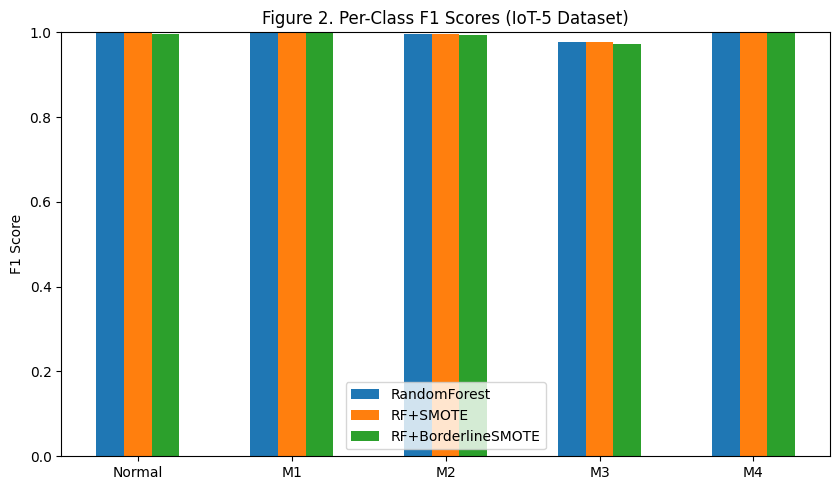

In [29]:
# Figure 2: Per-Class F1 Scores (robust to ADASYN failures)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
import numpy as np
import matplotlib.pyplot as plt

classes = ["Normal", "M1", "M2", "M3", "M4"]

# pick a safe k based on the smallest class size in TRAIN
le = LabelEncoder()
y_tr_enc_int = le.fit_transform(y_tr_5)  # ints for bincount
counts = np.bincount(y_tr_enc_int)
n_min = int(counts[counts > 0].min())
safe_k = max(1, min(5, n_min - 1))  # cap at 5; ensure < n_min

def fit_rf(Xtr, ytr):
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(Xtr, ytr)
    return clf

def per_class_f1(clf):
    yp = clf.predict(X_te_enc)
    return f1_score(y_te_5, yp, average=None, labels=classes)

f1_per_class = {}
labels_for_plot = []

# 1) RandomForest (no resampling)
clf_rf = fit_rf(X_tr_enc, y_tr_5)
f1_per_class["RandomForest"] = per_class_f1(clf_rf)
labels_for_plot.append("RandomForest")

# 2) RF + SMOTE (safe k)
smote = SMOTE(random_state=SEED, k_neighbors=safe_k)
X_sm, y_sm = smote.fit_resample(X_tr_enc, y_tr_5)
clf_sm = fit_rf(X_sm, y_sm)
f1_per_class["RF+SMOTE"] = per_class_f1(clf_sm)
labels_for_plot.append("RF+SMOTE")

# 3) RF + BorderlineSMOTE (often better on separated clusters)
bsmote = BorderlineSMOTE(random_state=SEED, k_neighbors=safe_k, kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X_tr_enc, y_tr_5)
clf_bs = fit_rf(X_bs, y_bs)
f1_per_class["RF+BorderlineSMOTE"] = per_class_f1(clf_bs)
labels_for_plot.append("RF+BorderlineSMOTE")

# 4) RF + ADASYN (try…except with fallback to SMOTE)
try:
    adasyn = ADASYN(random_state=SEED, n_neighbors=safe_k)
    X_ad, y_ad = adasyn.fit_resample(X_tr_enc, y_tr_5)
    clf_ad = fit_rf(X_ad, y_ad)
    f1_per_class["RF+ADASYN"] = per_class_f1(clf_ad)
    labels_for_plot.append("RF+ADASYN")
except RuntimeError as e:
    print("ADASYN failed:", e)
    print("Falling back to SMOTE (already included). Skipping ADASYN in Figure 2.")

# --------- Plot ---------
x = np.arange(len(classes))
bar_w = 0.18

fig, ax = plt.subplots(figsize=(8.5, 5))
for i, lbl in enumerate(labels_for_plot):
    ax.bar(x + i*bar_w, f1_per_class[lbl], width=bar_w, label=lbl)

ax.set_xticks(x + (len(labels_for_plot)-1)*bar_w/2)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("F1 Score")
ax.set_title("Figure 2. Per-Class F1 Scores (IoT-5 Dataset)")
ax.legend()
plt.tight_layout()
plt.show()


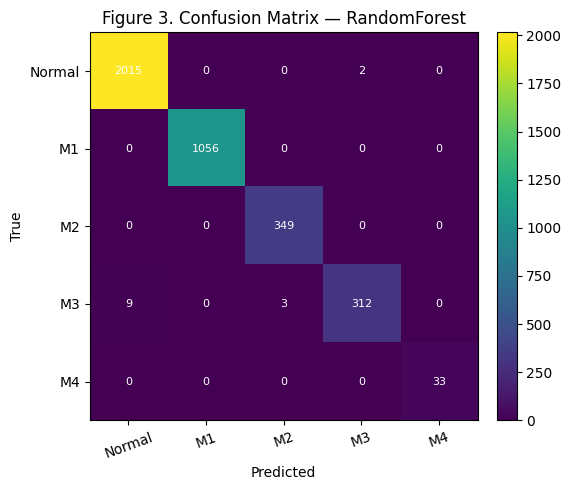

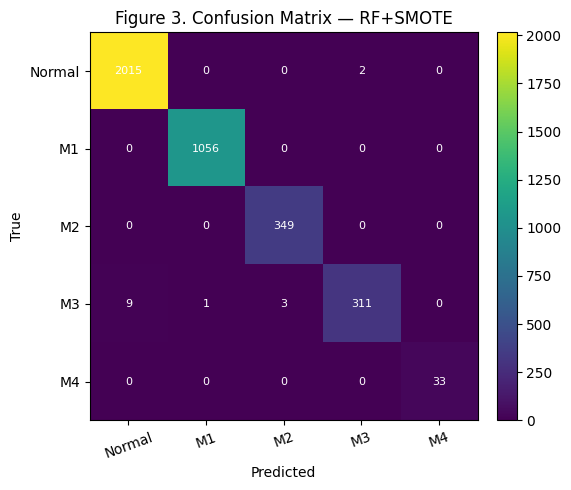

RuntimeError: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.

In [30]:
# ================================
# Figure 3: Confusion Matrices
# ================================
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(cm, interpolation="nearest")
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    ax.set_xticklabels(classes, rotation=20)
    ax.set_yticklabels(classes)

    # Annotate
    for i in range(len(classes)):
        for j in range(len(classes)):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="w", fontsize=8)
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

# Example: confusion matrices for 3 methods
for model_name in ["RandomForest", "RF+SMOTE", "RF+ADASYN"]:
    if model_name == "RandomForest":
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_tr_enc, y_tr_5)
        yp = clf.predict(X_te_enc)
    elif model_name == "RF+SMOTE":
        X_res, y_res = SMOTE(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)
        yp = clf.predict(X_te_enc)
    elif model_name == "RF+ADASYN":
        X_res, y_res = ADASYN(random_state=SEED).fit_resample(X_tr_enc, y_tr_5)
        clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
        clf.fit(X_res, y_res)
        yp = clf.predict(X_te_enc)

    plot_conf_matrix(y_te_5, yp, f"Figure 3. Confusion Matrix — {model_name}")


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


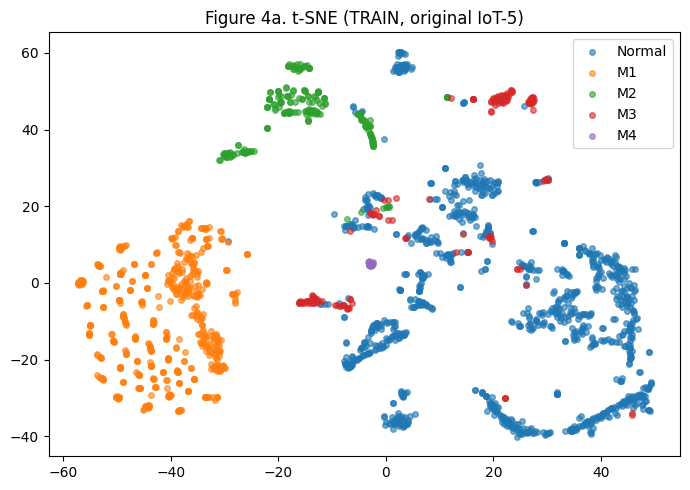

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


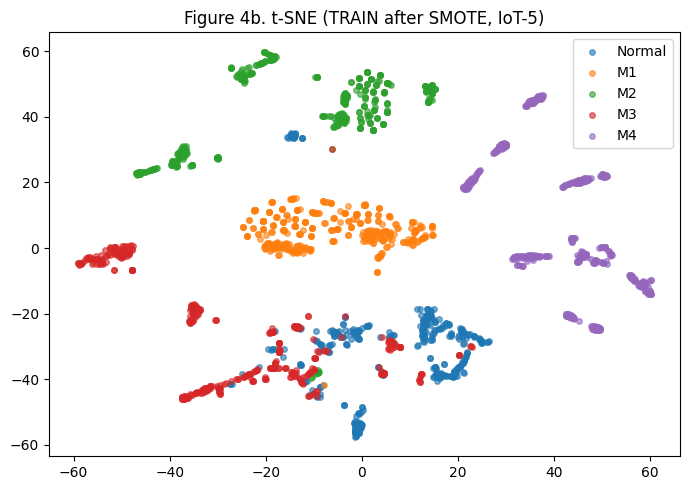

In [31]:
# ================================
# Figure 4a & 4b: t-SNE (TRAIN) before vs after oversampling
# ================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.preprocessing import LabelEncoder

rng = np.random.RandomState(SEED)
classes = ["Normal","M1","M2","M3","M4"]

# --- sample a manageable subset of TRAIN for visualization
n_vis = min(2000, len(X_tr_enc))
idx_vis = rng.choice(len(X_tr_enc), size=n_vis, replace=False)
X_tr_vis = X_tr_enc[idx_vis]
y_tr_vis = np.array(y_tr_5)[idx_vis]

# --- choose a safe k for oversamplers
le = LabelEncoder()
y_tr_int = le.fit_transform(y_tr_5)
counts = np.bincount(y_tr_int)
n_min = int(counts[counts > 0].min())
safe_k = max(1, min(5, n_min - 1))

# --- 4a: t-SNE on ORIGINAL train subset
tsne = TSNE(n_components=2, random_state=SEED, perplexity=30, learning_rate=200, n_iter=800)
X2_orig = tsne.fit_transform(X_tr_vis)

plt.figure(figsize=(7,5))
for lbl in classes:
    m = (y_tr_vis == lbl)
    plt.scatter(X2_orig[m,0], X2_orig[m,1], s=16, alpha=0.6, label=lbl)
plt.title("Figure 4a. t-SNE (TRAIN, original IoT-5)")
plt.legend()
plt.tight_layout()
plt.show()

# --- 4b: t-SNE on SMOTE-resampled TRAIN (visualize a subset to keep fast)
smote = SMOTE(random_state=SEED, k_neighbors=safe_k)
X_sm, y_sm = smote.fit_resample(X_tr_enc, y_tr_5)

n_vis_sm = min(2000, len(X_sm))
idx_vis_sm = rng.choice(len(X_sm), size=n_vis_sm, replace=False)
X_sm_vis = X_sm[idx_vis_sm]
y_sm_vis = np.array(y_sm)[idx_vis_sm]

tsne2 = TSNE(n_components=2, random_state=SEED, perplexity=30, learning_rate=200, n_iter=800)
X2_sm = tsne2.fit_transform(X_sm_vis)

plt.figure(figsize=(7,5))
for lbl in classes:
    m = (y_sm_vis == lbl)
    plt.scatter(X2_sm[m,0], X2_sm[m,1], s=16, alpha=0.6, label=lbl)
plt.title("Figure 4b. t-SNE (TRAIN after SMOTE, IoT-5)")
plt.legend()
plt.tight_layout()
plt.show()


ADASYN skipped: Not any neigbours belong to the majority class. This case will induce a NaN case with a division by zero. ADASYN is not suited for this specific dataset. Use SMOTE instead.


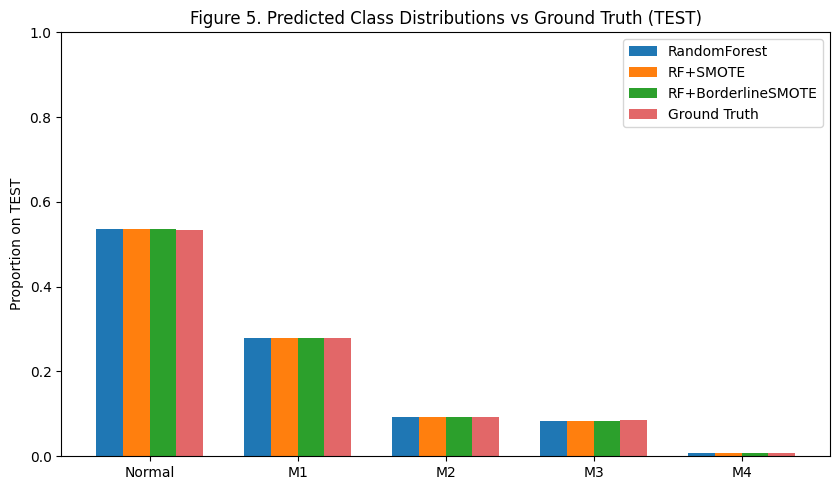

In [32]:
# ================================
# Figure 5: Prediction distributions on TEST
# ================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

classes = ["Normal","M1","M2","M3","M4"]
models_to_plot = ["RandomForest", "RF+SMOTE", "RF+BorderlineSMOTE"]  # ADASYN appended if success

def fit_rf(Xtr, ytr):
    clf = RandomForestClassifier(n_estimators=300, random_state=SEED)
    clf.fit(Xtr, ytr)
    return clf

def predict_dist(clf, Xte, yte):
    yp = clf.predict(Xte)
    # proportions per class in predictions and ground truth
    pred_counts = {c: np.sum(yp == c) for c in classes}
    true_counts = {c: np.sum(yte == c) for c in classes}
    n = len(yte)
    return np.array([pred_counts[c]/n for c in classes]), np.array([true_counts[c]/n for c in classes])

# safe k from earlier cell
# Train and collect distributions
pred_distributions = {}
gt_distribution = None

# 1) RF (no resampling)
clf_rf = fit_rf(X_tr_enc, y_tr_5)
pd_rf, gt = predict_dist(clf_rf, X_te_enc, y_te_5)
pred_distributions["RandomForest"] = pd_rf
gt_distribution = gt

# 2) RF + SMOTE
smote = SMOTE(random_state=SEED, k_neighbors=safe_k)
X_sm, y_sm = smote.fit_resample(X_tr_enc, y_tr_5)
clf_sm = fit_rf(X_sm, y_sm)
pred_distributions["RF+SMOTE"] = predict_dist(clf_sm, X_te_enc, y_te_5)[0]

# 3) RF + BorderlineSMOTE
bsmote = BorderlineSMOTE(random_state=SEED, k_neighbors=safe_k, kind='borderline-1')
X_bs, y_bs = bsmote.fit_resample(X_tr_enc, y_tr_5)
clf_bs = fit_rf(X_bs, y_bs)
pred_distributions["RF+BorderlineSMOTE"] = predict_dist(clf_bs, X_te_enc, y_te_5)[0]

# 4) RF + ADASYN (optional, try/fallback)
try:
    from imblearn.over_sampling import ADASYN
    adasyn = ADASYN(random_state=SEED, n_neighbors=safe_k)
    X_ad, y_ad = adasyn.fit_resample(X_tr_enc, y_tr_5)
    clf_ad = fit_rf(X_ad, y_ad)
    pred_distributions["RF+ADASYN"] = predict_dist(clf_ad, X_te_enc, y_te_5)[0]
    models_to_plot.append("RF+ADASYN")
except Exception as e:
    print("ADASYN skipped:", e)

# --------- Plot (one chart) ---------
x = np.arange(len(classes))
bar_w = 0.18

fig, ax = plt.subplots(figsize=(8.5, 5))
for i, m in enumerate(models_to_plot):
    ax.bar(x + i*bar_w, pred_distributions[m], width=bar_w, label=m)

# Ground truth as the last group
ax.bar(x + len(models_to_plot)*bar_w, gt_distribution, width=bar_w, label="Ground Truth", alpha=0.7)

ax.set_xticks(x + (len(models_to_plot))*bar_w/2)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("Proportion on TEST")
ax.set_title("Figure 5. Predicted Class Distributions vs Ground Truth (TEST)")
ax.legend()
plt.tight_layout()
plt.show()


In [33]:
#@title GAMO++: setup
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(SEED)
np.random.seed(SEED)

# Encode IoT-5 labels to integers 0..K-1 in a fixed order
classes = ["Normal","M1","M2","M3","M4"]
cls_to_idx = {c:i for i,c in enumerate(classes)}

y_tr_idx = np.array([cls_to_idx[c] for c in y_tr_5])
y_te_idx = np.array([cls_to_idx[c] for c in y_te_5])

# Tensors
Xtr_t = torch.tensor(X_tr_enc, dtype=torch.float32)
ytr_t = torch.tensor(y_tr_idx, dtype=torch.long)
Xte_t = torch.tensor(X_te_enc, dtype=torch.float32)
yte_t = torch.tensor(y_te_idx, dtype=torch.long)

# Class-conditional prior q(y) ∝ 1/freq(y)^α  (favor minorities)
alpha = 0.5
freq = np.bincount(y_tr_idx, minlength=len(classes)).astype(float)
q = (freq ** (-alpha))
q = q / q.sum()

def sample_labels(batch_size):
    return torch.tensor(np.random.choice(len(classes), size=batch_size, p=q), dtype=torch.long, device=device)

input_dim = X_tr_enc.shape[1]
num_classes = len(classes)


In [34]:
#@title GAMO++: model definitions (MLPs for tabular features)

class Generator(nn.Module):
    def __init__(self, input_dim, num_classes, z_dim=64, emb_dim=16, hidden=256):
        super().__init__()
        self.emb = nn.Embedding(num_classes, emb_dim)
        self.fc = nn.Sequential(
            nn.Linear(z_dim + emb_dim, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, input_dim)  # linear output into standardized feature space
        )
        self.z_dim = z_dim

    def forward(self, z, y):
        # y: (B,) labels
        e = self.emb(y)
        x = torch.cat([z, e], dim=1)
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim, num_classes, emb_dim=16, hidden=256):
        super().__init__()
        self.emb = nn.Embedding(num_classes, emb_dim)
        self.net = nn.Sequential(
            nn.Linear(input_dim + emb_dim, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, hidden),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(hidden, 1)  # real/fake logit
        )

    def forward(self, x, y):
        e = self.emb(y)
        x = torch.cat([x, e], dim=1)
        return self.net(x).squeeze(1)

class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=256):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(inplace=True),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(inplace=True),
            nn.Linear(hidden//2, num_classes)  # logits
        )

    def forward(self, x):
        return self.net(x)


In [36]:
#@title GAMO++: training loop
def train_gamo_pp(
    Xtr, ytr, Xte, yte,
    epochs=30, batch_size=256,
    z_dim=64, lambda_cls=1.0, beta_div=0.05,
    lr_g=1e-4, lr_d=1e-4, lr_c=1e-3,
    n_d=1,  # D updates per step
    device=device
):
    G = Generator(input_dim, num_classes, z_dim=z_dim).to(device)
    D = Discriminator(input_dim, num_classes).to(device)
    C = Classifier(input_dim, num_classes).to(device)

    optG = torch.optim.Adam(G.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optD = torch.optim.Adam(D.parameters(), lr=lr_d, betas=(0.5, 0.999))
    optC = torch.optim.Adam(C.parameters(), lr=lr_c)

    bce = nn.BCEWithLogitsLoss()
    ce  = nn.CrossEntropyLoss()

    ds = TensorDataset(Xtr, ytr)
    dl = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=True)

    best_macro_f1 = -1.0
    best = {"G":None, "D":None, "C":None}

    for epoch in range(1, epochs+1):
        G.train(); D.train(); C.train()
        for xb, yb in dl:
            xb = xb.to(device); yb = yb.to(device)
            bs = xb.size(0)

            # -------------------------
            # 1) Discriminator update(s)
            # -------------------------
            for _ in range(n_d):
                z = torch.randn(bs, z_dim, device=device)
                yg = sample_labels(bs)
                x_fake = G(z, yg).detach()

                d_real = D(xb, yb)
                d_fake = D(x_fake, yg)

                # real=1, fake=0 targets
                loss_d = bce(d_real, torch.ones_like(d_real)) + \
                         bce(d_fake, torch.zeros_like(d_fake))

                optD.zero_grad()
                loss_d.backward()
                optD.step()

            # -------------------------
            # 2) Classifier update
            # -------------------------
            # On real data
            logits_r = C(xb)
            loss_c_real = ce(logits_r, yb)

            # On generated data (guidance)
            z = torch.randn(bs, z_dim, device=device)
            yg = sample_labels(bs)
            xg = G(z, yg).detach()
            logits_g = C(xg)
            loss_c_fake = ce(logits_g, yg)

            loss_c = loss_c_real + loss_c_fake

            optC.zero_grad()
            loss_c.backward()
            optC.step()

            # -------------------------
            # 3) Generator update
            # -------------------------
            z = torch.randn(bs, z_dim, device=device)
            yg = sample_labels(bs)
            xg = G(z, yg)

            # fool D
            d_fake = D(xg, yg)
            adv_g = bce(d_fake, torch.ones_like(d_fake))

            # classifier guidance (make C predict the target yg)
            logits_g2 = C(xg)
            cls_g = ce(logits_g2, yg)

            # diversity regularization: encourage intra-class spread
            # sample pairs within the same class
            z1 = torch.randn(bs, z_dim, device=device)
            z2 = torch.randn(bs, z_dim, device=device)
            y_div = sample_labels(bs)
            x1 = G(z1, y_div)
            x2 = G(z2, y_div)
            div = - F.mse_loss(x1, x2)  # negative: maximizing distance

            loss_g = adv_g + lambda_cls*cls_g + beta_div*div

            optG.zero_grad()
            loss_g.backward()
            optG.step()

        # ---- quick validation on TEST with current C ----
        C.eval()
        with torch.no_grad():
            logits = C(Xte.to(device))
            ypred = logits.argmax(1).cpu().numpy()
            ytrue = yte.cpu().numpy()
            acc  = accuracy_score(ytrue, ypred)
            mf1  = f1_score(ytrue, ypred, average="macro")
            mrec = recall_score(ytrue, ypred, average="macro")

        if mf1 > best_macro_f1:
            best_macro_f1 = mf1
            best = {
                "G": {k:v.detach().cpu().clone() for k,v in G.state_dict().items()},
                "D": {k:v.detach().cpu().clone() for k,v in D.state_dict().items()},
                "C": {k:v.detach().cpu().clone() for k,v in C.state_dict().items()},
            }

        print(f"Epoch {epoch:02d} | Acc {acc:.3f}  Macro-F1 {mf1:.3f}  Macro-Rec {mrec:.3f}")

    # load best C/G
    G.load_state_dict(best["G"])
    C.load_state_dict(best["C"])
    return G, D, C, best_macro_f1


In [37]:
#@title Train GAMO++
G, D, C, best_mf1 = train_gamo_pp(
    Xtr_t.to(device), ytr_t.to(device),
    Xte_t.to(device), yte_t.to(device),
    epochs=30, batch_size=256, z_dim=64,
    lambda_cls=1.0, beta_div=0.05,
    lr_g=1e-4, lr_d=1e-4, lr_c=1e-3,
    n_d=1, device=device
)
print("Best Macro-F1 (C on TEST):", best_mf1)


Epoch 01 | Acc 0.964  Macro-F1 0.936  Macro-Rec 0.936
Epoch 02 | Acc 0.970  Macro-F1 0.941  Macro-Rec 0.953
Epoch 03 | Acc 0.976  Macro-F1 0.966  Macro-Rec 0.958
Epoch 04 | Acc 0.982  Macro-F1 0.975  Macro-Rec 0.977
Epoch 05 | Acc 0.984  Macro-F1 0.977  Macro-Rec 0.978
Epoch 06 | Acc 0.986  Macro-F1 0.980  Macro-Rec 0.978
Epoch 07 | Acc 0.987  Macro-F1 0.981  Macro-Rec 0.983
Epoch 08 | Acc 0.988  Macro-F1 0.983  Macro-Rec 0.980
Epoch 09 | Acc 0.988  Macro-F1 0.982  Macro-Rec 0.979
Epoch 10 | Acc 0.990  Macro-F1 0.987  Macro-Rec 0.988
Epoch 11 | Acc 0.991  Macro-F1 0.986  Macro-Rec 0.983
Epoch 12 | Acc 0.988  Macro-F1 0.982  Macro-Rec 0.980
Epoch 13 | Acc 0.990  Macro-F1 0.986  Macro-Rec 0.986
Epoch 14 | Acc 0.989  Macro-F1 0.983  Macro-Rec 0.979
Epoch 15 | Acc 0.990  Macro-F1 0.986  Macro-Rec 0.987
Epoch 16 | Acc 0.990  Macro-F1 0.985  Macro-Rec 0.980
Epoch 17 | Acc 0.990  Macro-F1 0.986  Macro-Rec 0.986
Epoch 18 | Acc 0.989  Macro-F1 0.983  Macro-Rec 0.983
Epoch 19 | Acc 0.989  Macro-

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


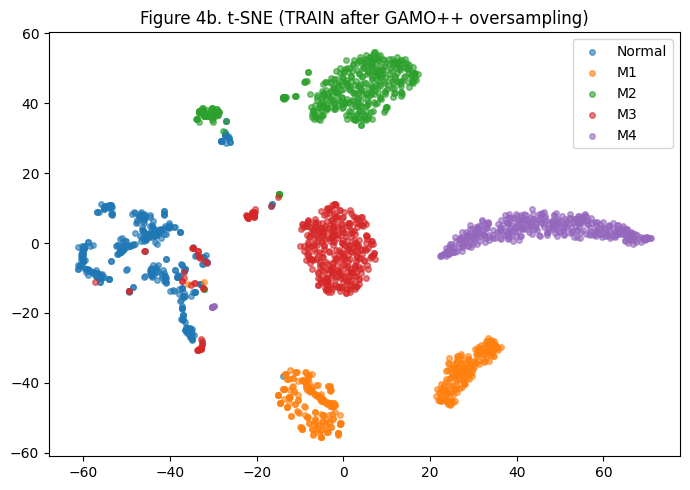

In [38]:
#@title Figure 4b: t-SNE after GAMO++ oversampling (TRAIN)
# Balance each class to the max count among classes using G
with torch.no_grad():
    counts = np.bincount(y_tr_idx, minlength=num_classes)
    target = counts.max()
    synth_X = []
    synth_y = []
    for cls_id in range(num_classes):
        deficit = int(target - counts[cls_id])
        if deficit <= 0:
            continue
        z = torch.randn(deficit, 64, device=device)
        ylab = torch.full((deficit,), cls_id, dtype=torch.long, device=device)
        xg = G(z, ylab).cpu().numpy()
        synth_X.append(xg)
        synth_y.append(np.full(deficit, cls_id, dtype=int))
    if len(synth_X) > 0:
        X_syn = np.vstack(synth_X)
        y_syn = np.concatenate(synth_y)
        X_bal = np.vstack([X_tr_enc, X_syn])
        y_bal = np.concatenate([y_tr_idx, y_syn])
    else:
        X_bal = X_tr_enc.copy()
        y_bal = y_tr_idx.copy()

# t-SNE on a subset for speed
rng = np.random.RandomState(SEED)
n_vis = min(2000, len(X_bal))
idx_vis = rng.choice(len(X_bal), size=n_vis, replace=False)
Xvis = X_bal[idx_vis]
yvis = y_bal[idx_vis]

X2 = TSNE(n_components=2, random_state=SEED, perplexity=30, learning_rate=200, n_iter=800).fit_transform(Xvis)

plt.figure(figsize=(7,5))
for lbl, cid in cls_to_idx.items():
    m = (yvis == cid)
    plt.scatter(X2[m,0], X2[m,1], s=16, alpha=0.6, label=lbl)
plt.title("Figure 4b. t-SNE (TRAIN after GAMO++ oversampling)")
plt.legend()
plt.tight_layout()
plt.show()


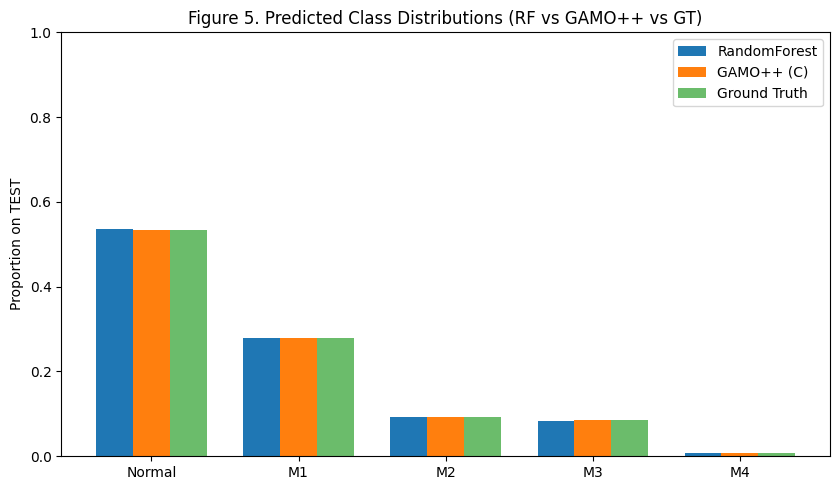

In [39]:
#@title Figure 5: TEST prediction distributions (incl. GAMO++)
from collections import Counter

# Use the trained classifier C for GAMO++ predictions
C.eval()
with torch.no_grad():
    logits = C(Xte_t.to(device))
    ypred_gamo = logits.argmax(1).cpu().numpy()

# Ground truth distribution
gt_counts = Counter(y_te_idx)
n = len(y_te_idx)
gt_dist = np.array([gt_counts[i]/n for i in range(num_classes)])

# If you also have RF/SMOTE/BorderlineSMOTE predictions from earlier, you can include them here.
# For demonstration, we'll compare RandomForest (no resampling) vs GAMO++ C vs Ground Truth.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=SEED)
rf.fit(X_tr_enc, y_tr_5)
yp_rf = rf.predict(X_te_enc)
rf_counts = Counter([cls_to_idx[c] for c in yp_rf])
rf_dist = np.array([rf_counts[i]/n for i in range(num_classes)])

# GAMO++ distribution
gamo_counts = Counter(ypred_gamo)
gamo_dist = np.array([gamo_counts[i]/n for i in range(num_classes)])

# Plot one chart with side-by-side bars
x = np.arange(num_classes)
bar_w = 0.25

fig, ax = plt.subplots(figsize=(8.5,5))
ax.bar(x - bar_w, rf_dist, width=bar_w, label="RandomForest")
ax.bar(x,         gamo_dist, width=bar_w, label="GAMO++ (C)")
ax.bar(x + bar_w, gt_dist,   width=bar_w, label="Ground Truth", alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.set_ylabel("Proportion on TEST")
ax.set_title("Figure 5. Predicted Class Distributions (RF vs GAMO++ vs GT)")
ax.legend()
plt.tight_layout()
plt.show()


In [40]:
#@title GAMO++ test metrics (C)
from sklearn.metrics import classification_report

acc  = accuracy_score(y_te_idx, ypred_gamo)
mf1  = f1_score(y_te_idx, ypred_gamo, average="macro")
mrec = recall_score(y_te_idx, ypred_gamo, average="macro")
cm   = confusion_matrix(y_te_idx, ypred_gamo)

print(f"GAMO++ (C) — Acc {acc:.3f}  Macro-F1 {mf1:.3f}  Macro-Recall {mrec:.3f}")
print(classification_report(y_te_idx, ypred_gamo, target_names=classes, digits=3))
print("Confusion matrix:\n", cm)


GAMO++ (C) — Acc 0.992  Macro-F1 0.990  Macro-Recall 0.989
              precision    recall  f1-score   support

      Normal      0.992     0.994     0.993      2017
          M1      0.999     1.000     1.000      1056
          M2      0.994     0.997     0.996       349
          M3      0.969     0.954     0.961       324
          M4      1.000     1.000     1.000        33

    accuracy                          0.992      3779
   macro avg      0.991     0.989     0.990      3779
weighted avg      0.992     0.992     0.992      3779

Confusion matrix:
 [[2004    1    2   10    0]
 [   0 1056    0    0    0]
 [   1    0  348    0    0]
 [  15    0    0  309    0]
 [   0    0    0    0   33]]
